In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

print(tf.__version__)

2.3.0


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.target.shape

(569,)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D =X_train.shape

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = Sequential([
        Input(shape=(D,)),
        Dense(1, activation='sigmoid')
])


model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 0.6010 - accuracy: 0.6614 - val_loss: 0.5083 - val_accuracy: 0.7766
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7454 - val_loss: 0.4488 - val_accuracy: 0.8191
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4813 - accuracy: 0.8110 - val_loss: 0.3985 - val_accuracy: 0.8777
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8714 - val_loss: 0.3572 - val_accuracy: 0.9096
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8871 - val_loss: 0.3234 - val_accuracy: 0.9362
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.9108 - val_loss: 0.2950 - val_accuracy: 0.9468
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.9344 - val_loss: 0.2722 - val_accuracy: 0.9521
Epoch 8/100


In [15]:
print("Train Score:", model.evaluate(X_train, y_train))
print("Test Score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9816
Train Score: [0.10100927203893661, 0.9816272854804993]
6/6 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9894
Test Score: [0.049789249897003174, 0.9893617033958435]


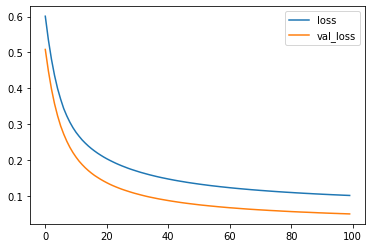

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

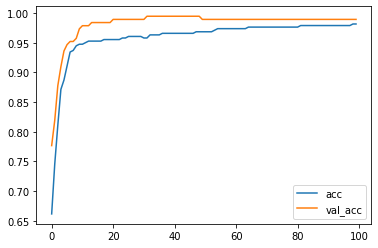

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
P = model.predict(X_test)
print(P)

[[9.96595144e-01]
 [9.39316928e-01]
 [9.63952303e-01]
 [6.96064889e-01]
 [9.63222921e-01]
 [9.98212814e-01]
 [9.98535514e-01]
 [1.19402495e-04]
 [9.94693995e-01]
 [4.53996956e-02]
 [3.19382250e-02]
 [3.95518363e-01]
 [2.97898054e-03]
 [9.99848366e-01]
 [2.22390890e-03]
 [9.63351607e-01]
 [9.99559879e-01]
 [9.97366011e-01]
 [9.99559283e-01]
 [6.14494085e-04]
 [4.81992960e-04]
 [9.93241370e-01]
 [9.63713288e-01]
 [1.30226523e-01]
 [8.10391009e-01]
 [9.71942186e-01]
 [9.37232733e-01]
 [2.72238970e-01]
 [3.82760167e-03]
 [9.99635577e-01]
 [9.99529004e-01]
 [9.96362031e-01]
 [1.95503235e-04]
 [6.48573314e-06]
 [9.84748781e-01]
 [9.83608127e-01]
 [9.98570144e-01]
 [9.84311700e-01]
 [8.95585358e-01]
 [2.53319740e-04]
 [9.74490345e-01]
 [7.88589896e-05]
 [9.92160499e-01]
 [2.11745501e-04]
 [9.70164299e-01]
 [9.94994283e-01]
 [9.93085444e-01]
 [9.96384680e-01]
 [9.91312385e-01]
 [8.17839503e-02]
 [9.98067141e-01]
 [9.99333858e-01]
 [9.93883491e-01]
 [9.35747147e-01]
 [1.67382360e-02]
 [9.953324

In [21]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]


In [23]:
print("Manually Calculated Accuracy:", np.mean(P == y_test))
print("Evaluate Output:", model.evaluate(X_test, y_test))

Manually Calculated Accuracy: 0.9893617021276596
6/6 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9894
Evaluate Output: [0.049789249897003174, 0.9893617033958435]


In [24]:
model.save('LinearClassification.h5')